In [1]:
# install.packages("CausalImpact")
library('CausalImpact')
library(ggplot2)
library("missForest")

Loading required package: bsts

Loading required package: BoomSpikeSlab

Loading required package: Boom


Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: ‘bsts’


The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn




In [ ]:
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10
tmp <- cbind(y, x1)
plot(tmp)


In [2]:
require("reticulate")
source_python("pickle_reader.py")
ndvi_1994_mean <- read_pickle_file("../../working/ndvi_changed_mean_1994")

Loading required package: reticulate



Posterior inference {CausalImpact}

                         Average            Cumulative      
Actual                   0.59               11.71           
Prediction (s.d.)        0.6 (0.0057)       11.9 (0.1139)   
95% CI                   [0.58, 0.61]       [11.68, 12.12]  
                                                            
Absolute effect (s.d.)   -0.0094 (0.0057)   -0.1884 (0.1139)
95% CI                   [-0.02, 0.0019]    [-0.40, 0.0381] 
                                                            
Relative effect (s.d.)   -1.6% (0.94%)      -1.6% (0.94%)   
95% CI                   [-3.3%, 0.33%]     [-3.3%, 0.33%]  

Posterior tail-area probability p:   0.044
Posterior prob. of a causal effect:  95.6%

For more details, type: summary(impact, "report")

NULL


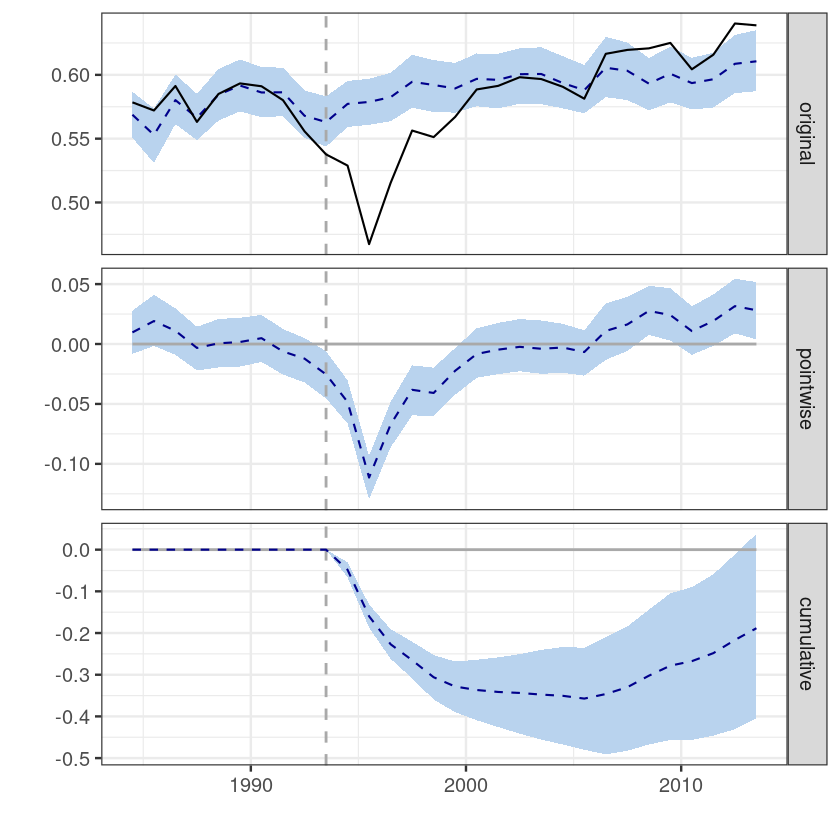

In [3]:
set.seed(6)
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)
data <- zoo(ndvi_1994_mean, t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
print(summary(impact))

In [4]:
ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")

In [116]:
set.seed(123)
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
res2=matrix(,nrow=length(ndvi_1994_data),ncol=5)

for(k in 1:length(ndvi_1994_data)){
    print(k)
    flush.console()
    tryCatch({
        data=ndvi_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        t_na_rm = t[all_columns_na==FALSE]
        data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data_na_rm)
        imputed_data<-imputed_data[1]$ximp

        data_ts <- zoo(imputed_data, t_na_rm)
        ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y <- data_ts[,1]
        data_ts_ave = zoo(cbind(y,ave),t_na_rm)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        impact2 <- CausalImpact(data_ts, pre.period, post.period)

        res[k,1] = impact$summary$Actual[1]
        res[k,2] = impact$summary$Pred[1]
        res[k,3] = impact$summary$AbsEffect[1]
        res[k,4] = impact$summary$RelEffect[1]
        res[k,5] = impact$summary$p[1]

        res2[k,1] = impact2$summary$Actual[1]
        res2[k,2] = impact2$summary$Pred[1]
        res2[k,3] = impact2$summary$AbsEffect[1]
        res2[k,4] = impact2$summary$RelEffect[1]
        res2[k,5] = impact2$summary$p[1]},
        
    error=function(err){return(NA)})
}

[1] 1


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 2
[1] 3


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 4
[1] 5
[1] 6
[1] 7


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 8


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 9


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 10


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 11


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 12


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 13


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 14


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 15


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 16


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 17


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 18


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 19


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 20


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 21


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 22


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 23


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 24


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 25


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 26


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 27


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 28


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 29


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 30


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 31


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 32


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 33


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 34


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 35


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 36


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 37


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 38


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1986-07-01”


[1] 39


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 40


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 41


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 42


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 43


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 44


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 45
[1] 46


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 47


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 55


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 56
[1] 57
[1] 58


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 59


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 74
[1] 75


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81


Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”
Warning message in FormatInputPrePostPeriod(pre.period, post.period, data):
“Setting pre.period[1] to start of data: 1985-07-01”


[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1] 140
[1] 141
[1] 142
[1] 143
[1] 144
[1] 145
[1] 146
[1] 147
[1] 148
[1] 149
[1] 150
[1] 151
[1] 152
[1] 153
[1] 154
[1] 155
[1] 156
[1] 157
[1] 158
[1] 159
[1] 160
[1] 161
[1] 162
[1] 163
[1] 164
[1] 165
[1] 166
[1] 167
[1] 168
[1] 169
[1] 170
[1] 171
[1] 172
[1] 173
[1] 174
[1] 175
[1] 176
[1] 177
[1] 178
[1] 179
[1] 180
[1] 181
[1] 182
[1] 183
[1] 184
[1] 185
[1] 186
[1] 187
[1] 188
[1] 189
[1] 190
[1] 191
[1] 192
[1] 193
[1] 194
[1] 195
[1] 196
[1] 197
[1] 198
[1] 199
[1] 200
[1] 201
[1] 202
[1] 203
[1] 204
[1] 205
[1] 206
[1] 207
[1] 208
[1

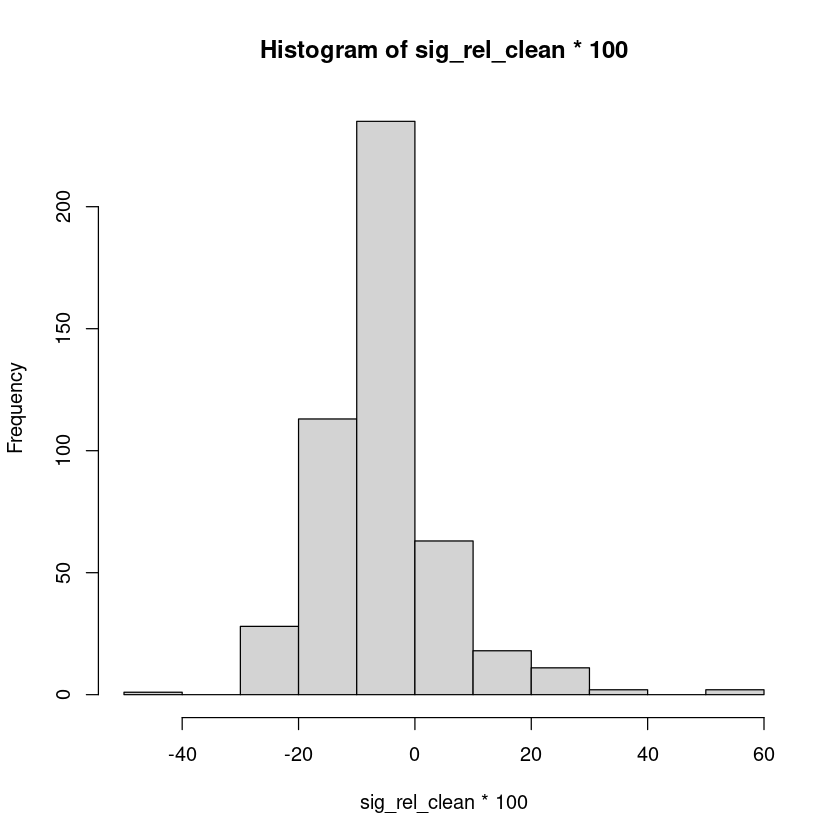

In [110]:
zscore <- function(data,std){
    (abs(data-mean(data))/sd(data))
}
res_na <- apply(res, 1, function(row) all(is.na(row)))
res_no_nan =res[res_na==FALSE,] 
sig = res_no_nan[,5]<0.05
sig_rel = res_no_nan[sig,4]
sig_rel_clean = sig_rel[(zscore(sig_rel)<3)]
hist(sig_rel_clean*100)

In [115]:
res2_na <- apply(res2, 1, function(row) all(is.na(row)))
res2_no_nan =res2[res2_na==FALSE,] 
sig2 = res2_no_nan[,5]<0.05
sig2_rel = res2_no_nan[sig2,4]
# sig2_rel_clean = sig2_rel[(zscore(sig2_rel)<3)]
# hist(sig2_rel_clean*100)

numeric(0)

In [91]:
d[132,]

[1] NA NA NA NA NA

In [71]:
which(is.na(res[,5]))

[1] 211 214 215 217 218 219 221 227 228 230 231 233 234 242

In [ ]:
res[]

[1] 211


[1] NA

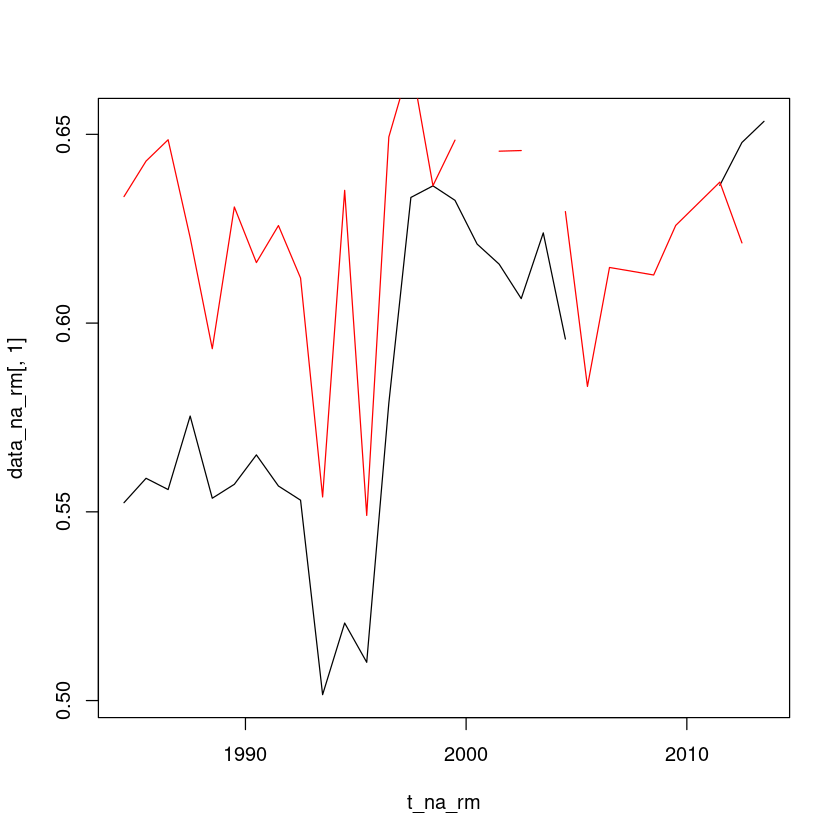

In [53]:
k=211
print(k)
flush.console()
tryCatch({
    data=ndvi_1994_data[k]
    data<-matrix(unlist(data),nrow=30)
    all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
    t_na_rm = t[all_columns_na==FALSE]
    data_na_rm = data[all_columns_na==FALSE,]
    length(t_na_rm)
    plot(t_na_rm,data_na_rm[,1],'l')
    lines(t_na_rm,data_na_rm[,2],col='red')
    imputed_data<-missForest(data_na_rm)
    imputed_data<-imputed_data[1]$ximp

    data_ts <- zoo(imputed_data, t_na_rm)
    ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
    y <- data_ts[,1]
    data_ts_ave = zoo(cbind(y,ave),t_na_rm)
    pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    post.period <- as.Date(c("1994-07-01", "2013-07-01"))
    impact <- CausalImpact(data_ts_ave, pre.period, post.period)
    res[k,1] = impact$summary$Actual[1]
    res[k,2] = impact$summary$Pred[1]
    res[k,3] = impact$summary$AbsEffect[1]
    res[k,4] = impact$summary$RelEffect[1]
    res[k,5] = impact$summary$p[1]

    res2[k,1] = impact2$summary$Actual[1]
    res2[k,2] = impact2$summary$Pred[1]
    res2[k,3] = impact2$summary$AbsEffect[1]
    res2[k,4] = impact2$summary$RelEffect[1]
    res2[k,5] = impact2$summary$p[1]},
    
    error=function(err){
        return(NA)
    })
# data=ndvi_1994_data[k]
# data<-matrix(unlist(data),nrow=30)
# all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
# t_na_rm = t[all_columns_na==FALSE]
# data_na_rm = data[all_columns_na==FALSE,]
# length(t_na_rm)
# plot(t_na_rm,data_na_rm[,1],'l')
# lines(t_na_rm,data_na_rm[,2],col='red')
# imputed_data<-missForest(data_na_rm)
# imputed_data<-imputed_data[1]$ximp

# data_ts <- zoo(imputed_data, t_na_rm)
# ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
# y <- data_ts[,1]
# data_ts_ave = zoo(cbind(y,ave),t_na_rm)
# pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
# post.period <- as.Date(c("1994-07-01", "2013-07-01"))
# impact <- CausalImpact(data_ts_ave, pre.period, post.period)

In [52]:
res[210,]

[1]  0.618136738  0.626156841 -0.008020103 -0.013019357  0.141000000

In [ ]:
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
for(i in 1:length(ndvi_1994_data)){
    print(i)
    flush.console()
    data=ndvi_1994_data[i]
    tmp<-matrix(unlist(data),nrow=30)
    tmp_cor = kNN(data=tmp,k=2,imp_var=FALSE)
    data <- zoo(tmp_cor, t)
    pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    post.period <- as.Date(c("1994-07-01", "2013-07-01"))
    impact <- CausalImpact(data, pre.period, post.period)

    res[i,1] = impact$summary$Actual[1]
    res[i,2] = impact$summary$Pred[1]
    res[i,3] = impact$summary$AbsEffect[1]
    res[i,4] = impact$summary$RelEffect[1]
    res[i,5] = impact$summary$p[1]

}

    